In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from sklearn.datasets import make_blobs

In [2]:
data = pd.read_csv("titanic.csv", sep=',')
titanic_df = pd.DataFrame(data)
titanic_df.iloc[0:5,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_df = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_df['Sex'].replace('female', 0, inplace=True)
titanic_df['Sex'].replace('male', 1, inplace=True)
titanic_df.iloc[0:5,:]

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [5]:
titanic_df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

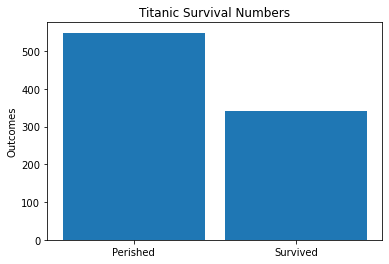

In [6]:
counts = titanic_df['Survived'].value_counts()
w = .35
plt.bar(x=[0,.4], height=counts, width=w)
plt.xticks([0,.4], ("Perished", "Survived"))
plt.title("Titanic Survival Numbers")
plt.ylabel("Outcomes")
plt.show()


In [7]:
titanic_df.mean()

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [8]:
titanic_df.groupby(titanic_df['Survived']).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


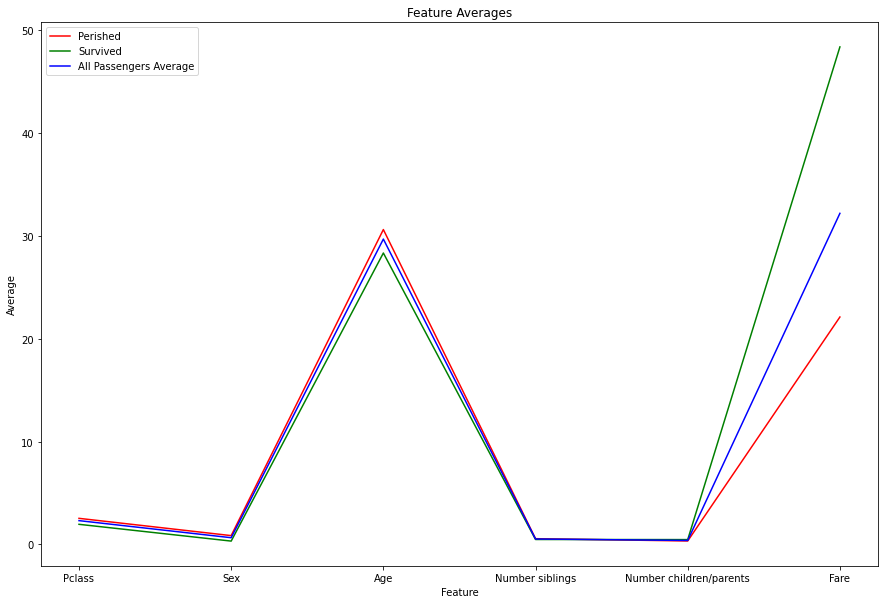

In [9]:
samples = np.array(['Pclass', 'Sex', 'Age', 'Number siblings', 'Number children/parents', 'Fare'])
all_passengers_avg = titanic_df.drop('Survived', axis=1).mean()
average = titanic_df.groupby(titanic_df['Survived']).mean()

plt.figure(1, figsize=(15,10))
plt.plot(samples, average.iloc[0,:], 'r', label='Perished')
plt.plot(samples, average.iloc[1,:], 'g', label='Survived')
plt.plot(samples, all_passengers_avg, 'b', label='All Passengers Average')
plt.title("Feature Averages")
plt.xlabel("Feature")
plt.ylabel("Average")
plt.legend()
plt.show()


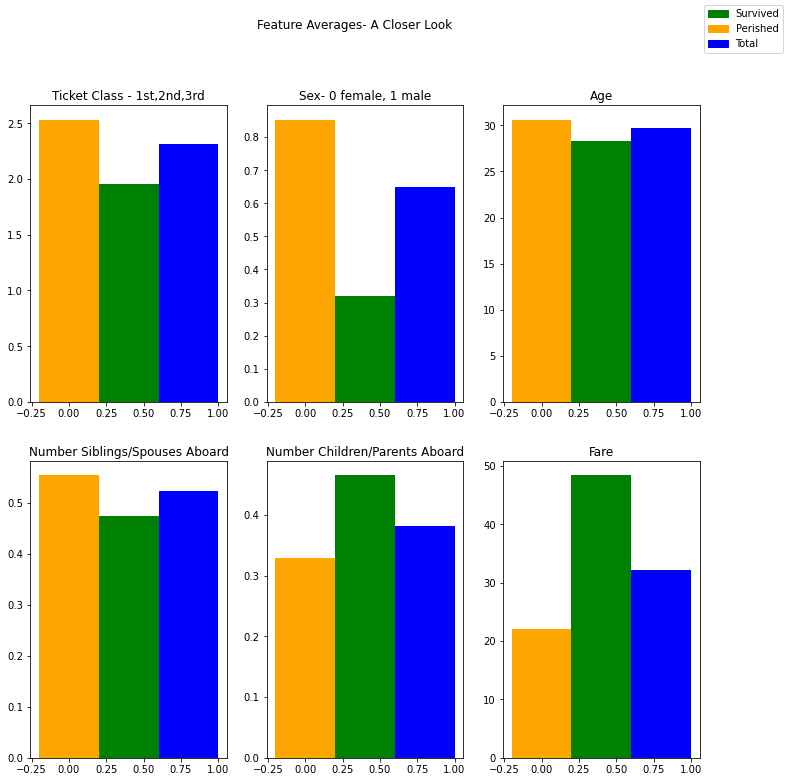

In [10]:
fig, ax = plt.subplots( nrows = 2, ncols = 3, figsize =(12,12))
all_passengers_avg = titanic_df.drop(['Survived'], axis=1).mean()
average = titanic_df.groupby(titanic_df['Survived']).mean()
average = average.append(all_passengers_avg, ignore_index=True)



counts = average.iloc[:,0]
p_class = ax[0,0].bar(x=[0,.4,.8], width= .4, height=counts, color= ['orange', 'g', 'b'])
ax[0,0].title.set_text('Ticket Class - 1st,2nd,3rd')

counts = average.iloc[:,1]
sex = ax[0,1].bar(x=[0,.4,.8], width= .4, height=counts, color= ['orange', 'g', 'b'])
ax[0,1].title.set_text("Sex- 0 female, 1 male")

counts = average.iloc[:,2]
age = ax[0,2].bar(x=[0,.4,.8], width= .4, height=counts, color= ['orange', 'g', 'b'])
ax[0,2].title.set_text("Age")

counts = average.iloc[:,3]
sib_sp = ax[1,0].bar(x=[0,.4,.8], width= .4, height=counts, color= ['orange', 'g', 'b'])
ax[1,0].title.set_text("Number Siblings/Spouses Aboard")

counts = average.iloc[:,4]
parch = ax[1,1].bar(x=[0,.4,.8], width= .4, height=counts, color= ['orange', 'g', 'b'])
ax[1,1].title.set_text("Number Children/Parents Aboard")


counts = average.iloc[:,5]
fare = ax[1,2].bar(x=[0,.4,.8], width= .4, height=counts, color= ['orange', 'g', 'b'])
ax[1,2].title.set_text("Fare")

fig.suptitle("Feature Averages- A Closer Look")
bar_labels = ["Perished","Survived","Total"]

perished_patch = mpatches.Patch(color='orange', label='Perished')
survived_patch = mpatches.Patch(color='green', label='Survived')
total_patch = mpatches.Patch(color='blue', label='Total')

fig.legend(handles=[survived_patch, perished_patch, total_patch])


In [11]:
titanic_df.drop("Survived", axis=1).apply(lambda x: x.corr(titanic_df['Survived']))

Pclass   -0.338481
Sex      -0.543351
Age      -0.077221
SibSp    -0.035322
Parch     0.081629
Fare      0.257307
dtype: float64

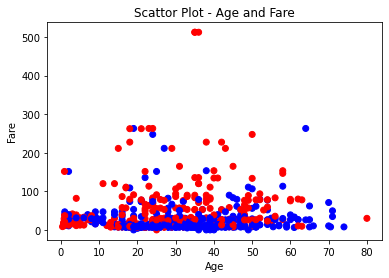

In [12]:
colors= np.where(titanic_df['Survived'] == 1, 'r', 'b')
plt.scatter(titanic_df['Age'], titanic_df['Fare'], c=colors)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title("Scattor Plot - Age and Fare")
plt.show()